# Project Phân tích và ứng dụng máy học sự kiện chìm tàu Titanic
<p align="center">
  <img src="Titanic.jpg" alt="Titanic" width="400"/>
</p>
bối cảnh: Titanic là chiếc tàu vượt đại dương chở khách chạy bằng động cơ hơi nước đã đi vào lịch sử ngành hàng hải vì vụ tai nạn hàng hải đã xảy ra với nó cũng như những bí ẩn liên quan. Tên chính thức của nó là RMS Titanic (RMS là viết tắt của Royal Mail Ship). Tàu bắt đầu được đóng vào năm 1909 và được hạ thủy năm 1912. Là con tàu lớn, hiện đại, lộng lẫy và sang trọng nhất lúc đó, Titanic mang theo tham vọng thống trị tuyến đường biển xuyên Đại Tây Dương của công ty sở hữu nó, hãng vận tải biển The White Star Line. Tuy nhiên, trong chuyến vượt Đại Tây Dương đầu tiên và cũng là cuối cùng của nó vào tháng 4 năm 1912, Titanic đã đắm do đâm vào một tảng băng trôi, khiến hơn 1.500 người tử nạn. Vụ đắm tàu này đã đi vào lịch sử như là vụ tai nạn hàng hải nghiêm trọng nhất trong thời bình. (Wikipedia)

## Các thư viện cần thiết

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Đọc dữ liệu

In [139]:
train_df = pd.read_csv("./titanic/train.csv")
test_df = pd.read_csv("./titanic/test.csv", index_col='PassengerId')

train_df.set_index(train_df.PassengerId, inplace = True)
train_df.drop('PassengerId', axis = 1, inplace = True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Cân chỉnh dữ liệu

In [140]:
#chinh du lieu ve dang category
train_df["Survived"] = train_df["Survived"].astype("category")

train_df["Survived"].dtype

converted_features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
 
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, converted_features)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


## Data Distribution (Phân bố của dữ liệu)

In [141]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [142]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [143]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Phân tích khai phá dữ liệu

Target của data: Survived

Số hàng khách sống sót: 342 (0.38%)

Số hàng khách tử nạn: 549 (0.62%)

#### Survived

In [144]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [145]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


#### Sex

In [146]:
train_df["Sex"].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [147]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

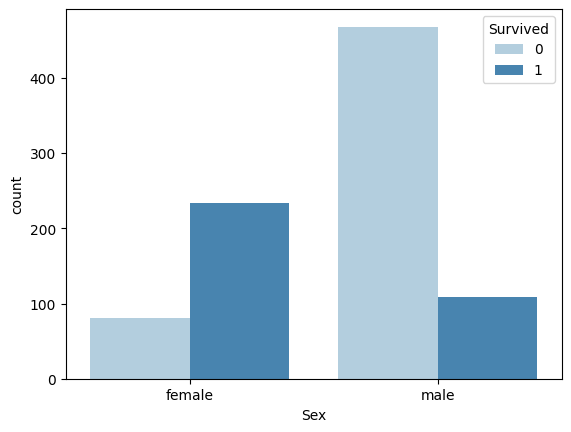

In [148]:
sns.countplot(data = train_df, x = 'Sex', hue = 'Survived', palette= 'Blues')

Thống kê các dữ liệu còn lại

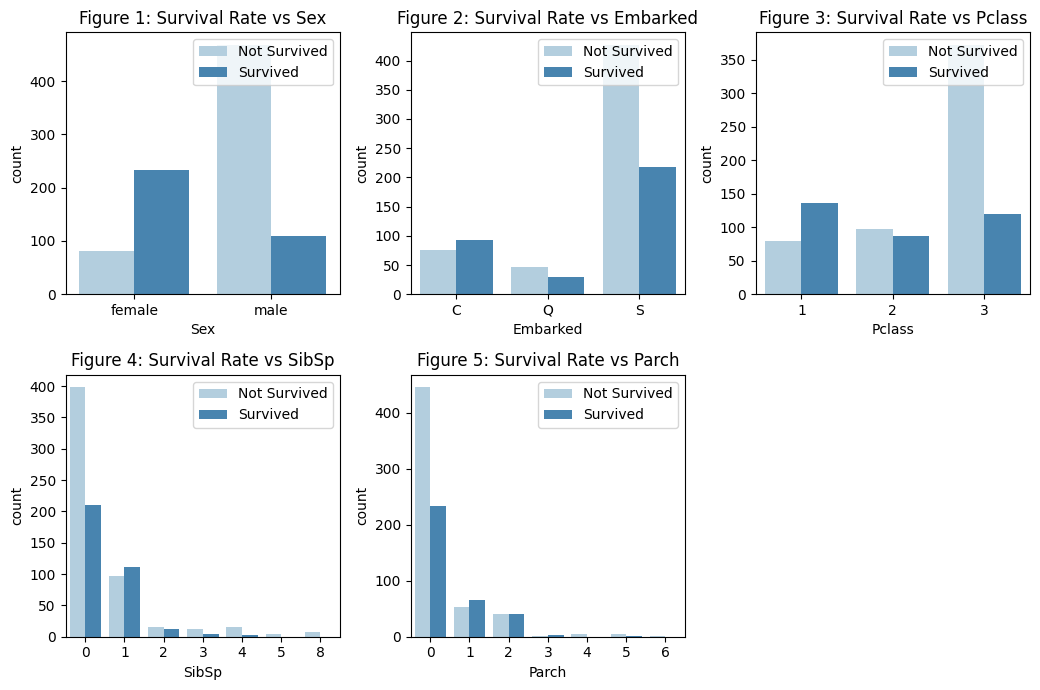

In [149]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fix, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c #duyet qua list cols
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data = train_df, x = cols[i], hue = 'Survived', palette = "Blues", ax = ax_i)
            ax_i.set_title(f"Figure {i + 1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc = 'upper right', labels= ['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False) #xoa bieu do thua
plt.tight_layout()
plt.show()

Phân tích các dữ liệu dạng số

Age

<Axes: xlabel='Age', ylabel='Count'>

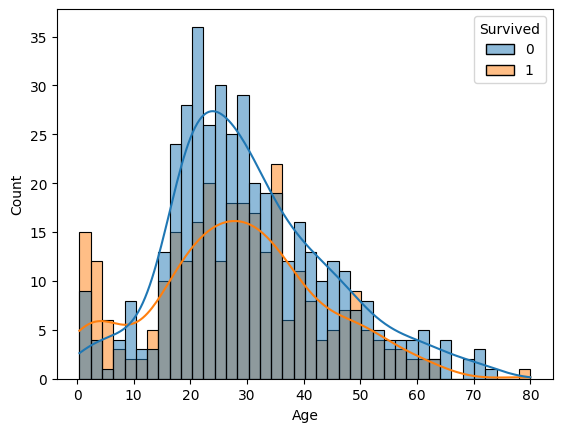

In [150]:
sns.histplot(data = train_df, x = 'Age', hue = 'Survived', bins = 40, kde=True)

Fare

In [151]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

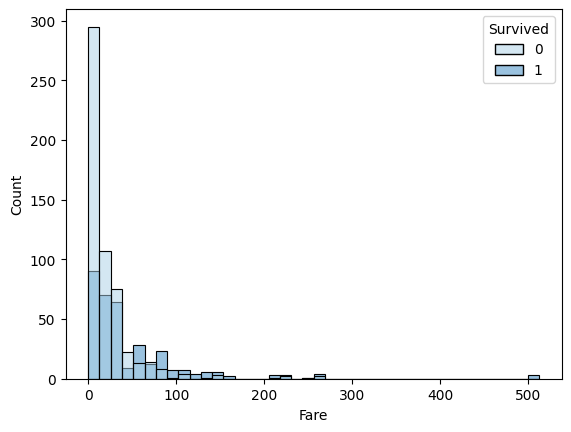

In [152]:
sns.histplot(data = train_df, x='Fare', hue = 'Survived', bins = 40, palette='Blues')

Chia nhỏ lại thành 4 mức hạng vé cho dễ quan sát

0-25, 25-50, 50-75, 75-100

<Axes: xlabel='Fare', ylabel='count'>

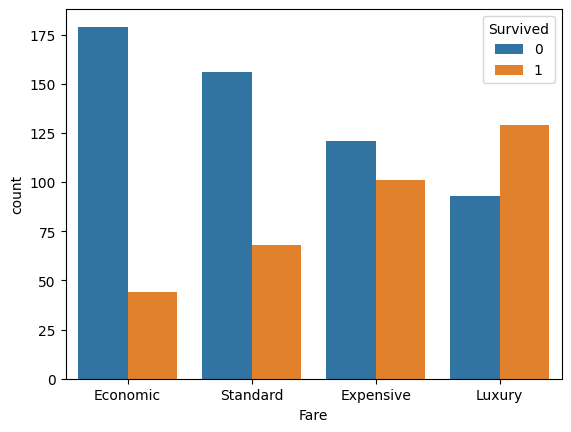

In [153]:
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)

sns.countplot(x = quartile_data, hue = train_df['Survived'])

### Feature Engineering & Data Wrangling

#### Name
Tách bắt đầu là dấu , kết thúc là dấu .

In [154]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [155]:
import re

def extract_title (name):
    p = re.compile(r", ([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [156]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [157]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

gom nhóm các title ít

In [158]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

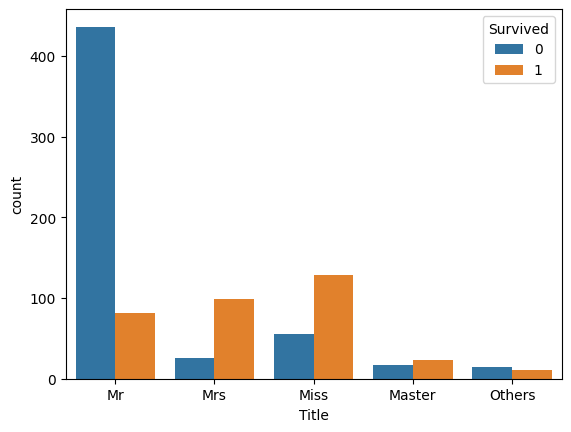

In [159]:
sns.countplot(data = train_df, x = 'Title', hue = 'Survived')

### Family
-Gom hai cột Sibsp, Parch thành Family_Size

<Axes: xlabel='Family_Cat', ylabel='count'>

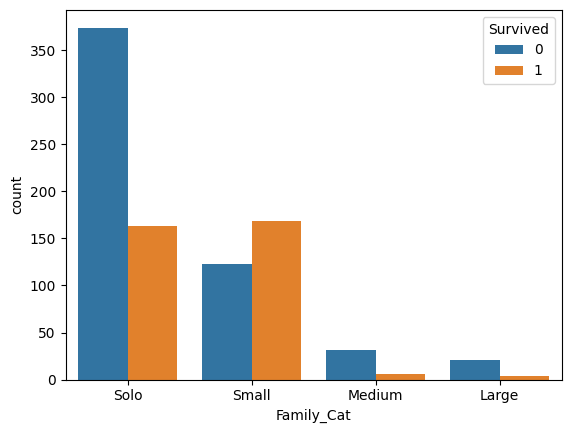

In [160]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

#chia nho cac cot
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins = [0, 1, 4, 6, 20], labels = ['Solo', 'Small', 'Medium', 'Large']) #(0, 1], (1,4], (4, 6], (6, 20]

sns.countplot(data = train_df, x = 'Family_Cat', hue = 'Survived')

### Data Wrangling

In [161]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [162]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print (f"cot {col} thieu {missing_count*100 / n_rows:.2f} % data")

display_missing(train_df, feature_cols)
# display_missing(test_df, feature_cols)

cot Age thieu 19.87 % data
cot Embarked thieu 0.22 % data


### Filling missing values

cột Age thiếu dữ liệu khá nhiều, mình sẽ fill các giá trị đó bằng giá trị median (trung vị)

Hoặc mình có thể fill dữ liệu thông qua sự tương đồng giữa các dữ liệu khác tương quan với Age

In [163]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()

age_by_sex_pclass

# train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
# test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'] \
                          .transform(lambda x: x.fillna(x.median()))
test_df['Age']  = test_df.groupby(['Sex', 'Pclass'])['Age'] \
                         .transform(lambda x: x.fillna(x.median()))

display_missing(train_df, feature_cols)
# display_missing(test_df, feature_cols)

cot Embarked thieu 0.22 % data


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6952\195111261.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6952\195111261.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'] \


In [164]:
X = train_df[feature_cols]
y = train_df['Survived']

X_test = test_df[feature_cols]

KeyError: "['Family_Cat'] not in index"

Sử dụng pipeline để fill các data còn thiếu còn lại

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps = [
    ('inputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ('inputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [ ]:
preprocessor.fix(X)

AttributeError: 'ColumnTransformer' object has no attribute 'fix'

In [ ]:
X = preprocessor.transform(X)

X_test = preprocessor.transform(X_test)

## Model training

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

NameError: name 'X' is not defined

In [ ]:
 X_train.shape, X_val.shape

NameError: name 'X_train' is not defined